In [2]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn import cluster
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from clusterian import misc

/home/ldap/ipellet/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
rna = pd.read_csv("../data/DataRnaseq_Transposed.csv", index_col=0)
g2v = pd.read_csv("../data/gene2vec_dim_200_iter_9.csv", index_col=0)

In [3]:
HC_rna_clust = AgglomerativeClustering(compute_full_tree="auto", compute_distances=True, n_clusters=40).fit(rna)

In [4]:
np.unique(HC_rna_clust.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [16]:
HC_g2v_clust = AgglomerativeClustering(compute_full_tree=True, compute_distances=True).fit(g2v)

In [7]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

In [8]:
link = plot_dendrogram(HC_g2v_clust)

Error in callback <function flush_figures at 0x7f5e07b3eaf0> (for post_execute):


KeyboardInterrupt: 

In [144]:
cutHeight = np.linspace(10,1500,100)
chs = []
for cut in cutHeight:
    lab = hierarchy.fcluster(link, t=cut, criterion='distance')
    #n_cluster = len(np.unique(lab))
    chs.append(calinski_harabasz_score(rna,lab))

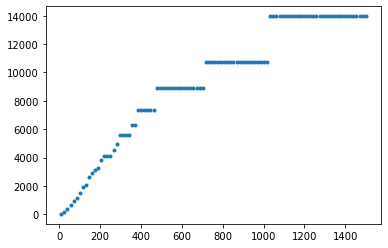

In [146]:
plt.plot(cutHeight, chs, ".")

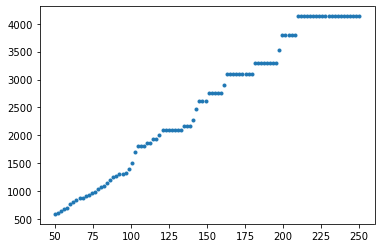

In [166]:
cutHeight = np.linspace(50,250,100)
chs = []
sil = []
n_cluster = []
for cut in cutHeight:
    lab = hierarchy.fcluster(link, t=cut, criterion='distance')
    n_cluster.append(len(np.unique(lab)))
    chs.append(calinski_harabasz_score(rna,lab))
    sil.append(silhouette_score(rna,lab))
plt.plot(cutHeight, chs, ".")

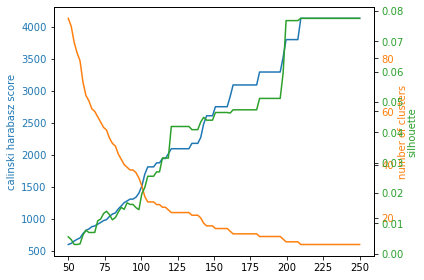

In [167]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel("calinski harabasz score", color=color)
ax1.plot(cutHeight, chs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:orange'
ax2.set_ylabel("number of clusters", color=color)
ax2.plot(cutHeight, n_cluster, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_yscale("log")

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel("silhouette", color=color)
ax3.plot(cutHeight, sil, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# Gene2vec

In [90]:
ward_g2v = cluster.ward_tree(g2v)

In [91]:
ward_child = ward_g2v[0]

In [92]:
n_samples = g2v.shape[0]
n_samples

24447

In [93]:
i = 4
ward_child[i][0]
ward_child[i][1]

22086

In [94]:
n_cl = n_samples
lab = pd.Series([i for i in range(n_samples)],index=g2v.index)
#for i in range(len(ward_child)):

In [156]:
k = 200
i = 0
lab_df = pd.DataFrame(lab)
for i in range(len(ward_child)):
    a,b = ward_child[i]
    new_node = n_samples + i
    new_lab = lab_df.iloc[:,-1].copy(deep=True)
    new_lab[lab_df.iloc[:,-1]==a] = new_node
    new_lab[lab_df.iloc[:,-1]==b] = new_node
    lab_df = pd.concat([lab_df, new_lab], axis=1)
    n_cl = n_samples-1-i

In [158]:
n_cl_ = [n_samples-i for i in range(len(ward_child)+1)]

In [159]:
lab_df.columns = n_cl_

In [160]:
lab_df

,24447,24446,24445,24444,24443,24442,24441,24440,24439,24438,...,10,9,8,7,6,5,4,3,2,1
0,,,,,,,,,,,,,,,,,,,,,
PLAC4,0,0,0,0,0,0,0,0,0,0,...,48883,48883,48883,48883,48887,48887,48887,48890,48891,48892
RPS2P45,1,1,1,1,1,1,1,1,1,1,...,48879,48879,48885,48885,48885,48885,48885,48885,48891,48892
C3orf18,2,2,2,2,2,2,2,2,2,2,...,48883,48883,48883,48883,48887,48887,48887,48890,48891,48892
C6orf226,3,3,3,3,3,3,3,3,3,3,...,48880,48880,48880,48880,48887,48887,48887,48890,48891,48892
CISD3,4,4,4,4,4,4,4,4,4,4,...,48880,48880,48880,48880,48887,48887,48887,48890,48891,48892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC284219,24442,24442,24442,24442,24442,24442,24442,24442,24442,24442,...,48880,48880,48880,48880,48887,48887,48887,48890,48891,48892
KRTAP21-1,24443,24443,24443,24443,24443,24443,24443,24443,24443,24443,...,48871,48871,48871,48871,48871,48888,48889,48889,48889,48892
PHBP8,24444,24444,24444,24444,24444,24444,24444,24444,24444,24444,...,48883,48883,48883,48883,48887,48887,48887,48890,48891,48892


In [163]:
lab_df.loc[:,500:50].to_csv("HC_g2v_labMat.csv", header=True, index=True)

In [168]:
from clusterian import hierarchical
from importlib import reload

In [268]:
reload(hierarchical)

<module 'clusterian.hierarchical' from '/home/ldap/ipellet/Documents/Clustering/clusterian/hierarchical.py'>

In [269]:
ward_test = cluster.ward_tree(g2v.iloc[:100,:10])

In [270]:
lab_test = hierarchical.ward_tree_2_label_mat(ward_test[0], genes=g2v.index[:100])

In [271]:
lab_test

,100,99,98,97,96,95,94,93,92,91,...,10,9,8,7,6,5,4,3,2,1
0,,,,,,,,,,,,,,,,,,,,,
PLAC4,0,0,0,0,0,104,104,104,104,104,...,186,190,190,190,190,190,190,190,197,198
RPS2P45,1,1,1,1,1,1,1,1,1,1,...,170,170,191,191,191,191,195,196,197,198
C3orf18,2,2,2,2,2,2,2,2,2,2,...,188,188,188,188,188,194,194,196,197,198
C6orf226,3,3,3,3,3,3,3,3,3,3,...,186,190,190,190,190,190,190,190,197,198
CISD3,4,100,100,100,100,100,100,100,100,100,...,189,189,189,189,189,189,195,196,197,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAT8L,95,95,95,95,95,95,95,95,107,107,...,186,190,190,190,190,190,190,190,197,198
TIMM17A,96,96,96,96,96,96,96,96,96,96,...,189,189,189,189,189,189,195,196,197,198
ENPP2,97,97,97,97,97,97,97,97,97,97,...,189,189,189,189,189,189,195,196,197,198


Convert labels to matrix for $k\in[50,500]$.

In [177]:
import os

In [180]:
mm_path = './HC_mm'

In [184]:
for k in range(114,300):
    lab = lab_df.loc[:,k]
    mm = misc.lab2mat(lab, genes=g2v.index)
    mm.to_csv(os.path.join(mm_path,'HC_g2v_'+str(k)), header=False, index=True)

In [183]:
k

114

In [187]:
from clusterian import enrich

In [188]:
enrdir = 'Enrich'
enrich.runEnrichr_directory(mm_path = mm_path, mm_enrich_dir = enrdir)

Runing analysis on  HC_g2v_223
out_dir : ./HC_mm/Enrich
Cluster 101 : ['TTTY1', 'MMP26', 'LOC101928052', 'CDR1', 'WDR96', 'RAD21L1', 'PDE1A', 'ZNF808', 'LOC101926934', 'LOC102723954', 'LOC101929497', 'GALR2', 'WFDC3', 'LOC101927814', 'LOC101928207', 'PATE1', 'LOC101929148', 'CATSPER3', 'PLCXD3', 'LOC101927248', 'ZNF536', 'LOC101927157', 'LOC101927406', 'MCMDC2', 'FABP2', 'RAB3C', 'FLJ36840', 'SERPINC1', 'LINC00113', 'LOC100506236', 'SEMA3D', 'RFX4', 'SMR3A', 'ROS1', 'MAP1LC3C', 'LINC00305', 'LINC00708', 'PAK3', 'TTTY8', 'LOC100507033', 'BC015159', 'SPATA17', 'XKRY', 'LINC00307', 'HTR2A', 'LOC101929473', 'LHFPL3-AS1', 'SPANXB1', 'CSTL1', 'RGS7', 'MICALCL', 'TRPM3', 'LINC00598', 'ALDOAP2', 'LOC100129112', 'LOC100506122', 'FAM133A', 'RP11-661A12.9', 'SLC15A1', 'DCLK2', 'MYRFL', 'TBX5', 'OLAH', 'LOC100505498', 'TRIM31', 'LOC100506272', 'LOC102723559', 'NPVF', 'LOC554207', 'CRX', 'RAG1', 'C7orf69', 'PVRL3-AS1', 'RP11-420K14.2', 'UGT3A1', 'LOC101927043', 'LOC101929464', 'TTC6', 'LINC00895', 

2022-07-07 17:04:21,381 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 17:04:21,582 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 42 : ['RP11-433A10.3', 'BAAT', 'STK4-AS1', 'BARHL1', 'KCNG1', 'SSPO', 'CLCNKB', 'LAMB2P1', 'UCP3', 'PIANP', 'LINC01343', 'LPPR3', 'ZNF771', 'STAC2', 'TRPV5', 'LOC100507395', 'CBLN1', 'LOC100996425', 'RIPPLY1', 'LOC101927914', 'ARTN', 'SMIM12', 'TMUB1', 'KIF1A', 'SHBG', 'CTD-2537I9.16', 'LGI3', 'NXPH3', 'ZDHHC19', 'RP11-474P2.2', 'CLCN2', 'LOC100128079', 'LOC101928134', 'ADAMTS7', 'CHERP', 'ZNF316', 'AK130486', 'AC141928.1', 'SLC39A3', 'CLSTN3', 'CELA3A', 'SPRNP1', 'MYOC', 'KRT85', 'AMN', 'PKDREJ', 'GAFA2', 'SLC6A17', 'KHK', 'SPACA4', 'LUZP4', 'C1orf68', 'LOC100134368', 'CCDC182', 'RP11-448A19.1', 'HADHAP1', 'HOXB13', 'RP11-108P20.1', 'ZNF48', 'LOC100996654', 'DLGAP3', 'LOC101927702', 'HARBI1', 'PSD', 'LOC100132005', 'CTD-2619J13.17', 'ADH4', 'UNC13A', 'GUCA2A', 'RBFOX1', 'SHANK2-AS3', 'RP3-384D21.2', 'ZNF221', 'POM121L2', 'LHX1', 'AC003989.4', 'RP11-217B1.2', 'LOC101928221', 'KRTAP5-8', 'KLK2', 'TNFRSF13C', 'BCL6B', 'CDPF1', 'CEND1', 'LOC100507656', 'C10orf62', 'PGBD2', 'LDB1',

2022-07-07 17:19:34,607 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 17:19:34,805 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 42 : ['ENPP2', 'LRRC8D', 'ALDH3A2', 'LOC101927720', 'CTD-2124B8.2', 'COX14', 'LDOC1', 'EPB41L5', 'KIF3A', 'ANKRD46', 'CNPY2', 'ALDH18A1', 'FERMT2', 'GAS5', 'FZD7', 'ARV1', 'LOC100131262', 'ACVR2B', 'C16orf52', 'ADI1', 'ATPAF1', 'FNBP1L', 'FAM221A', 'DEPDC7', 'FAHD1', 'CAP2', 'FBXO32', 'MYOF', 'MTFR1', 'INSR', 'GPM6B', 'HPS4', 'LAPTM4B', 'BAG2', 'LAMB1', 'BLNK', 'ANKMY2', 'GPALPP1', 'LINC00342', 'DZIP3', 'OCRL', 'LGMN', 'HPGD', 'HRSP12', 'B3GALNT1', 'CCL28', 'ABCD3', 'BDH2', 'ACADSB', 'LAPTM4A', 'AVPR1A', 'EPB41L4A-AS1', 'C3orf70', 'CCDC50', 'HHAT', 'CTGF', 'IFT57', 'ARFGEF2', 'KATNAL1', 'FZD1', 'KLF5', 'ATP8B1', 'CISD1', 'ABCC5', 'FAM120C', 'FAM161B', 'EPS8', 'HN1L', 'GLIDR', 'FAM213A', 'COBLL1', 'KIAA0895', 'C17orf58', 'BMP2', 'LINC00888', 'EIF5A2', 'DCBLD1', 'ITGA6', 'ACACA', 'KCTD3', 'ATP7B', 'AKR1C3', 'AHI1', 'CXADR', 'FAM76A', 'FZD6', 'ABCB1', 'CCT6B', 'ATP1B1', 'CTSK', 'CAB39L', 'FKBP9', 'EXTL2', 'JAG1', 'RETSAT', 'ATP8A1', 'C16orf87', 'ERRFI1', 'ABCB4', 'AIG1', 'COL13A1'

2022-07-07 18:46:41,409 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 18:46:41,608 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 122 : ['CBWD2', 'CBWD5', 'CBWD7']
Cluster 200 : ['PCDHGA7', 'PCDHGB2', 'PCDHGB4', 'CDY1B']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_286
Runing analysis on  HC_g2v_233
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_233
Runing analysis on  HC_g2v_293
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_293
Runing analysis on  HC_g2v_106
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_106
Runing analysis on  HC_g2v_107
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_107
Runing analysis on  HC_g2v_139
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_139
Runing analysis on  HC_g2v_277
out_dir : ./HC_mm/Enrich
Cluster 125 : ['NICN1', 'PDLIM1', 'TAPBP', 'MTG1', 'SAT2', 'TESK1', 'NDUFB3', 'SLC25A11', 'TMSB4X', 'TST', 'TNS3', 'ZNF251', 'ACTN4', 'ZNF185', 'ABHD14B', 'CYTH1', 'TRMT1', 'PCTP', 'SEPW1', 'POLR2L', 'MRPL33', 'OS9', 'PRR34-AS1', 'IRF3', 'STRN4', 'SULT1A2', 'S100A6

2022-07-07 20:48:02,502 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 20:48:02,698 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 24 : ['LINC00705', 'HCN1', 'LOC255654', 'SLC6A19', 'OFCC1', 'NPPB', 'PTH2', 'LZTS1-AS1', 'RP5-1154L15.2', 'GSTM5', 'LOC101928851', 'SLC17A3', 'SNCB', 'C9orf50', 'FLJ31713', 'GNB3', 'IL1RAPL2', 'PMCHL2', 'CCDC184', 'GJB4', 'LOC145945', 'LPCAT4', 'TECTA', 'LOC339685', 'PNPLA2', 'MORN1', 'RGAG1', 'OR1F1', 'IL3RA', 'ACKR1', 'LOC400794', 'ALX3', 'LINC01107', 'RP11-893F2.14', 'OR12D3', 'LINC00421', 'PP13', 'P2RY4', 'NMUR2', 'TMEM253', 'CCDC154', 'PIGQ', 'GPR101', 'LOC149703', 'RASL10A', 'TRIM17', 'LRRC52', 'KLK1', 'RP1-212P9.2', 'TBC1D29', 'ZDHHC1', 'RHOXF1', 'C1orf64', 'TP53TG5', 'ADM5', 'LINC00106', 'RPL13AP17', 'CRB2', 'NKX1-1', 'ASCL5', 'FAM151A', 'KRT82', 'RP11-297L17.2', 'RP11-416I2.1', 'DEFA4', 'SUN5', 'LINC00687', 'TBC1D21', 'SPATA21', 'LOC101929549', 'CTD-3126B10.1', 'LINC01114', 'BANCR', 'P2RX6', 'LINC00330', 'RECQL5', 'GRPR', 'C1orf177', 'RP11-402G3.5', 'WSCD2', 'FERD3L', 'CHST8', 'C19orf80', 'OR10D1P', 'RASSF7', 'MAS1', 'SIRT6', 'OR2H4P', 'SPNS2', 'RP11-333I13.1', 'ELK2AP

2022-07-07 23:27:38,280 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 23:27:38,479 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 59 : ['NBPF10', 'ND3', 'PRSS1', 'NR1D1', 'PRICKLE4', 'MSH5', 'MSH5-SAPCD1', 'NARR', 'PCDHGA11', 'NUTM2F', 'NXF2', 'PCDHA1', 'NME1-NME2', 'P2RX5-TAX1BP3', 'PI4K2B', 'PABPC1L2A', 'NUTF2', 'PRH1', 'PIGY', 'PMS2', 'MZT2A', 'NDUFC2', 'NPIPA5', 'MUC3A', 'PRR23D1', 'NDUFS5', 'PDXP', 'NAT8', 'MYO18A', 'NT5C1B', 'RBMY1A1', 'PCDHB10', 'PLSCR3', 'OR2A20P', 'POU5F1', 'NCRNA00185', 'PPAN', 'PDCL3', 'PRAMEF1', 'NUTM2A', 'NHEJ1', 'PRR20A', 'OR4F16', 'NCR3LG1', 'P2RY11', 'MUSTN1', 'POT1-AS1']


2022-07-07 23:33:41,595 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-07 23:33:41,795 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 129 : ['GJC1', 'ADCY1', 'GNA14', 'ILDR1', 'DMKN', 'EHF', 'TPO', 'KCNN3', 'ALPK2', 'LOC101928635', 'HEBP2', 'ARSD', 'CLDN4', 'ARHGAP42', 'CABLES1', 'CALD1', 'ACOX2', 'CDCP1', 'NKX3-1', 'ADAMTS2', 'FBLIM1', 'DPCD', 'COL1A2', 'LAMA5', 'FBLN1', 'CXCL12', 'CSPG5', 'CGN', 'DCHS2', 'CAMK2B', 'AJAP1', 'BCL2L2', 'IGFBP6', 'LOC100507494', 'RGL3', 'KIAA1522', 'GJA4', 'CCDC3', 'CD248', 'KCNIP3', 'BDNF', 'CT83', 'AMOTL1', 'COPZ2', 'COL12A1', 'IRX2', 'KAL1', 'FAM107A', 'KRT8', 'CAPN6', 'ENTPD3', 'AMPD1', 'CDH10', 'LAMB3', 'DOK5', 'EFEMP1', 'DDR2', 'ITGA3', 'BCAT2', 'CCND1', 'GPR157', 'DENND2C', 'ACTG2', 'ANO1', 'CFTR', 'ABHD8', 'BAIAP2L1', 'FAM189B', 'ERN2', 'WNT5A', 'ITIH5', 'GALNT5', 'JAG2', 'LOC100507855', 'CPE', 'DIO2', 'ECM1', 'CEP112', 'EFNA5', 'FXYD3', 'CITED4', 'FGF18', 'KLHL1', 'HSD3B7', 'LIFR', 'BHMT2', 'ESRP1', 'DNAH5', 'ACE', 'DMRTA2', 'LANCL2', 'COL5A1', 'FMO3', 'COL16A1', 'APOE', 'IGFBP5', 'APBB2', 'ANKRD35', 'CSRP2', 'DEXI', 'CLDN7', 'COX7A1', 'ANTXR1', 'FA2H', 'KLF15', 'BTNL9

2022-07-08 00:15:35,269 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 00:15:35,466 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 188 : ['MIR1248', 'SNORA63', 'CCDC144B', 'MIR1234']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_230
Runing analysis on  HC_g2v_151
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_151
Runing analysis on  HC_g2v_249
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_249
Runing analysis on  HC_g2v_276
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_276
Runing analysis on  HC_g2v_175
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_175
Runing analysis on  HC_g2v_82
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_82
Runing analysis on  HC_g2v_93
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_93
Runing analysis on  HC_g2v_182
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_182
Runing analysis on  HC_g2v_135
out_dir : ./HC_mm/Enrich
Cluster 101 : ['HIST1H4K', 'HIST2H4A', 'SNORD14C']
Enrichment results in : ./HC_mm/Enrich/HC_g2v

2022-07-08 02:28:33,971 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 02:28:34,170 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 205 : ['HLA-DRB3', 'LOC101930053', 'HLA-DRB5', 'HLA-DQA2']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_238
Runing analysis on  HC_g2v_83
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_83
Runing analysis on  HC_g2v_116
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_116
Runing analysis on  HC_g2v_153
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_153
Runing analysis on  HC_g2v_127
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_127
Runing analysis on  HC_g2v_267
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_267
Runing analysis on  HC_g2v_227
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_227
Runing analysis on  HC_g2v_245
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_245
Runing analysis on  HC_g2v_90
out_dir : ./HC_mm/Enrich
Cluster 61 : ['LOC284661', 'SMO', 'MDGA1', 'YBX2', 'LOC100131303', 'LOC102725345', 'OXCT

2022-07-08 06:15:29,121 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 06:15:29,321 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 98 : ['IFNLR1', 'CILP', 'SMPDL3B', 'CASC10', 'FOXN3', 'RILP', 'CDH24', 'GRK5', 'DMWD', 'LOC102724561', 'EDC3', 'HNF1B', 'ENGASE', 'CTD-2008P7.1', 'CCDC57', 'CLEC1A', 'C1orf61', 'E2F4', 'FGD5-AS1', 'EHMT2', 'ADRBK1', 'DNAJC9-AS1', 'NHLRC4', 'SERPINB8', 'C2orf72', 'HDGFL1', 'FBXL18', 'CACNG6', 'GIGYF1', 'AC007389.3', 'EPHA8', 'AC106801.1', 'ERCC2', 'RNF157', 'CDH22', 'LINC01016', 'CDYL2', 'CD300LB', 'C16orf58', 'C6orf223', 'TOM1L2', 'LOC101927122', 'HGH1', 'C14orf178', 'C20orf203', 'KLK4', 'AQP2', 'STOML1', 'LOC101929897', 'KRBA1', 'CACFD1', 'C19orf84', 'CARHSP1', 'BCAN', 'FIZ1', 'SPATA24', 'APCDD1L-AS1', 'BMP1', 'LOC100505711', 'LINC01210', 'AQP6', 'USP13', 'C17orf82', 'C14orf159', 'ZNF843', 'LOC101928343', 'CACNG4', 'GSK3A', 'SF3B2', 'KIAA1751', 'ARHGEF15', 'ATN1', 'ABHD11', 'TMEM161A', 'TEK', 'UBE2D4', 'IRF2BP1', 'CCDC13', 'FRMD8', 'FAXDC2', 'GANAB', 'WHAMMP2', 'FAM222B', 'IKBKG', 'JMJD4', 'GRIK5', 'INO80B', 'ESPNL', 'AVPR1B', 'AC002059.10', 'HMGXB3', 'BTNL3', 'AP001605.4', 'E

2022-07-08 07:24:19,322 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 07:24:19,520 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 80 : ['IFNLR1', 'CILP', 'SMPDL3B', 'CASC10', 'FOXN3', 'RILP', 'CDH24', 'GRK5', 'DMWD', 'LOC102724561', 'EDC3', 'HNF1B', 'ENGASE', 'CTD-2008P7.1', 'CCDC57', 'CLEC1A', 'C1orf61', 'E2F4', 'FGD5-AS1', 'EHMT2', 'ADRBK1', 'DNAJC9-AS1', 'NHLRC4', 'SERPINB8', 'C2orf72', 'HDGFL1', 'FBXL18', 'CACNG6', 'GIGYF1', 'AC007389.3', 'EPHA8', 'AC106801.1', 'ERCC2', 'RNF157', 'CDH22', 'LINC01016', 'CDYL2', 'CD300LB', 'C16orf58', 'C6orf223', 'TOM1L2', 'LOC101927122', 'HGH1', 'C14orf178', 'C20orf203', 'KLK4', 'AQP2', 'STOML1', 'LOC101929897', 'KRBA1', 'CACFD1', 'C19orf84', 'CARHSP1', 'BCAN', 'FIZ1', 'SPATA24', 'APCDD1L-AS1', 'BMP1', 'LOC100505711', 'LINC01210', 'AQP6', 'USP13', 'C17orf82', 'C14orf159', 'ZNF843', 'LOC101928343', 'CACNG4', 'GSK3A', 'SF3B2', 'KIAA1751', 'ARHGEF15', 'ATN1', 'ABHD11', 'TMEM161A', 'TEK', 'UBE2D4', 'IRF2BP1', 'CCDC13', 'FRMD8', 'FAXDC2', 'GANAB', 'WHAMMP2', 'FAM222B', 'IKBKG', 'JMJD4', 'GRIK5', 'INO80B', 'ESPNL', 'AVPR1B', 'AC002059.10', 'HMGXB3', 'BTNL3', 'AP001605.4', 'E

2022-07-08 08:05:34,462 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 08:05:34,662 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 17 : ['UGT1A4', 'UGT1A8', 'UGT1A5', 'UGT1A7']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_189
Runing analysis on  HC_g2v_225
out_dir : ./HC_mm/Enrich
Cluster 145 : ['LOC100289019', 'IL18RAP', 'TUBGCP6', 'AGAP4', 'LOC101060581', 'PRKX', 'TRAV20', 'RASGRP1', 'RNF125', 'GPBP1L1', 'FDFT1', 'SEC31B', 'TBX21', 'NLRC3', 'IL2RB', 'LOC100996740', 'PCED1B', 'SPOCK2', 'RHOH', 'PVRIG', 'NCR3', 'MIAT', 'PRKCQ', 'HNRNPU-AS1', 'AX747182', 'BC043356', 'SIT1', 'NPIPA1', 'AGAP9', 'GZMA', 'RP11-468E2.5', 'B3GALT4', 'IFNG', 'SKAP1', 'SH2D1A', 'LOC100127972', 'ANKHD1', 'DSERG1', 'CRIPAK', 'ITM2A', 'TRAV13-2', 'LOC202025', 'SSBP3-AS1', 'TRAV26-2', 'SNRNP70', 'SLAMF1', 'CD8A', 'PLAC8', 'LINC00623', 'RP11-271C24.3', 'LOC286437', 'SLAMF6', 'LOC100133315', 'ZNF276', 'ZBTB48', 'CD3G', 'LOC728392', 'TRBV7-3', 'STAT4', 'RP11-589P10.5', 'TESPA1', 'STAG3L3', 'LY9', 'NEU3', 'CD3E', 'SLC26A6', 'LOC101927451', 'EOMES', 'LOC100996756', 'KLRB1', 'SLC9A3R1', 'RP11-664D1.1', 'TCRDV2', 'GZMK', 'TAPT1-AS1', 'LINC00

2022-07-08 08:49:51,569 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 08:49:51,767 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 74 : ['FAM153B', 'FAM153C', 'LOC101928349']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_272
Runing analysis on  HC_g2v_126
out_dir : ./HC_mm/Enrich
Cluster 82 : ['DLEU2L', 'C14orf64', 'CCDC65', 'FCRL1', 'F13A1', 'TSPAN2', 'SH3TC1', 'HIP1', 'AC083949.1', 'FCER2', 'CREB5', 'RNASE6', 'RP11-443B7.1', 'ABHD5', 'CCPG1', 'ARHGEF40', 'GPR34', 'BACH1', 'AVIL', 'GRIK1-AS2', 'ARL11', 'LOC101060691', 'FAR2', 'QPCT', 'KCNE1', 'CARD16', 'PSMB8', 'GIMAP2', 'TLR4', 'PAG1', 'IPMK', 'SLC15A3', 'REM2', 'F5', 'ACPP', 'CNTNAP3P2', 'SNX10', 'DLEU2', 'ENTPD1', 'ANKRD55', 'PIK3CG', 'CLEC5A', 'B3GNT5', 'CEP19', 'ATP8B3', 'IL10RA', 'LOC100130357', 'CDK19', 'NLRP3', 'GPR65', 'IDS', 'LINC00528', 'ATP7A', 'TBC1D1', 'ZRANB1', 'ABTB1', 'PSTPIP2', 'HLA-DQB1', 'PECAM1', 'NIN', 'LRRK2', 'ANKUB1', 'CD27', 'PI3', 'AICDA', 'HLA-DMA', 'C9orf66', 'PPP2R3C', 'CASP1', 'ARG1', 'HLA-DRB1', 'SH2D1B', 'PMAIP1', 'GIMAP6', 'EVI2A', 'BAZ2B', 'LOC100506459', 'C15orf48', 'MAML3', 'RAB11FIP4', 'C1orf228', 'UBL7-AS1', 'LCP2', 

2022-07-08 09:21:40,476 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 09:21:40,676 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 13 : ['IFNLR1', 'CILP', 'SMPDL3B', 'CASC10', 'FOXN3', 'RILP', 'CDH24', 'GRK5', 'DMWD', 'LOC102724561', 'EDC3', 'HNF1B', 'ENGASE', 'CTD-2008P7.1', 'CCDC57', 'CLEC1A', 'C1orf61', 'E2F4', 'FGD5-AS1', 'EHMT2', 'ADRBK1', 'DNAJC9-AS1', 'NHLRC4', 'SERPINB8', 'C2orf72', 'HDGFL1', 'FBXL18', 'CACNG6', 'GIGYF1', 'AC007389.3', 'EPHA8', 'AC106801.1', 'ERCC2', 'RNF157', 'CDH22', 'LINC01016', 'CDYL2', 'CD300LB', 'C16orf58', 'C6orf223', 'TOM1L2', 'LOC101927122', 'HGH1', 'C14orf178', 'C20orf203', 'KLK4', 'AQP2', 'STOML1', 'LOC101929897', 'KRBA1', 'CACFD1', 'C19orf84', 'CARHSP1', 'BCAN', 'FIZ1', 'SPATA24', 'APCDD1L-AS1', 'BMP1', 'LOC100505711', 'LINC01210', 'AQP6', 'USP13', 'C17orf82', 'C14orf159', 'ZNF843', 'LOC101928343', 'CACNG4', 'GSK3A', 'SF3B2', 'KIAA1751', 'ARHGEF15', 'ATN1', 'ABHD11', 'TMEM161A', 'TEK', 'UBE2D4', 'IRF2BP1', 'CCDC13', 'FRMD8', 'FAXDC2', 'GANAB', 'WHAMMP2', 'FAM222B', 'IKBKG', 'JMJD4', 'GRIK5', 'INO80B', 'ESPNL', 'AVPR1B', 'AC002059.10', 'HMGXB3', 'BTNL3', 'AP001605.4', 'E

2022-07-08 09:54:24,611 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 09:54:24,810 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 26 : ['PPM1L', 'OCIAD1', 'RNF19A', 'KBTBD4', 'PCGF5', 'ZNF780A', 'TRAF3', 'VKORC1L1', 'SIN3A', 'RP4-581F12.1', 'NIPBL', 'NBPF20', 'NKAP', 'ZNF12', 'SMC3', 'MED23', 'RABEP1', 'AGO2', 'CASC7', 'DQ574852', 'USP16', 'ND6', 'STK4', 'TFDP1', 'PHAX', 'RTKN2', 'ZDHHC21', 'NBN', 'LPP', 'MARCH6', 'MFAP3', 'SAFB', 'RP11-395B7.7', 'RANBP2', 'VAPA', 'PPID', 'MAPK9', 'NAPG', 'XPR1', 'RAB39B', 'TASP1', 'MBNL1', 'ZNF22', 'FLJ31306', 'YIPF6', 'SDE2', 'RRN3', 'ZNF397', 'STK38', 'OSBPL8', 'SENP3', 'LRRFIP1', 'ZKSCAN8', 'RAD51-AS1', 'LOC285147', 'ZC3H15', 'GAPVD1', 'UPF3A', 'SFPQ', 'RPS6KB1', 'MED28', 'RPS6KA2', 'TMEM206', 'SFT2D2', 'RPL7', 'RBM41', 'SNAP23', 'TM9SF3', 'SVIP', 'RB1', 'TOP3A', 'SMU1', 'SREK1', 'SCAMP1', 'MGEA5', 'RP11-379H18.1', 'LRCH3', 'SFSWAP', 'ZNF226', 'SMCHD1', 'UCHL5', 'SMIM14', 'NUS1', 'NUS1P3', 'SMAD2', 'SLC16A1', 'TIFA', 'MEF2A', 'ORMDL1', 'WDR36', 'SOS2', 'NELFCD', 'SMARCA5', 'NAP1L2', 'TAOK1', 'C11orf30', 'SNRPA1', 'RDX', 'NUP153', 'SETD8', 'SRPR', 'MAPK1', 'ZFX', 'RP11

2022-07-08 10:39:22,174 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 10:39:22,374 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 7 : ['DTX2', 'FLJ43315', 'FAM78A', 'FAM57B', 'GAGE12B', 'FIGF', 'FAM188B', 'FRG1', 'FPGT-TNNI3K', 'EIF4A1', 'FADS1', 'FAM182A', 'FAM27B', 'FAM136A', 'GABRE', 'FZD8', 'FAM115C', 'FAM177A1', 'DQ573539', 'FAM212B', 'FAM21C', 'FAM231D', 'FAM89A', 'F8A1', 'FAM201B', 'FAM66B', 'FAM66C', 'FLJ42351', 'ELOVL1', 'FLRT2', 'FLJ23867', 'DPPA3', 'FAM27E2', 'FAM156A', 'FBXO41', 'EPN2', 'EGFL8', 'FCGR3A', 'FAR2P2', 'FAM72A', 'EPPIN', 'FLJ30901', 'FAM21EP', 'ESRP2', 'FAM138A', 'FKBP1A-SDCBP2', 'FAM225A', 'FAM226A', 'FAM95B1', 'FAM87A', 'FAM21A', 'FLJ25694', 'FKBP1A', 'FSBP', 'DUSP8', 'FAM41AY1', 'ESRG', 'FOXD4', 'EFCAB3', 'FLJ23519', 'ERVK3-1', 'FAM223A', 'DQ592230', 'FRMPD2', 'ELMOD1', 'FAM101A', 'FFAR3', 'FAM86B1', 'FAM209A', 'FLJ16124', 'FAM133B']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_85
Runing analysis on  HC_g2v_200
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_200
Runing analysis on  HC_g2v_84
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich

2022-07-08 14:07:32,456 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 14:07:32,655 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 54 : ['SKA3', 'ERCC6L', 'TOP2A', 'CDCA5', 'LRP8', 'RUVBL1', 'DNAAF2', 'EXOSC9', 'UAP1', 'HMGA1', 'RAD51AP1', 'GTSE1', 'EXOSC2', 'E2F1', 'MYBL2', 'GGH', 'RAD54L', 'CENPI', 'STIL', 'KIF22', 'KIF14', 'PTTG1', 'UBE2C', 'DBF4', 'HAUS1', 'PAICS', 'ANLN', 'CDC25C', 'C19orf52', 'AURKA', 'CDCA8', 'SPC25', 'DONSON', 'C16orf59', 'PTTG3P', 'BCL2L12', 'CDC45', 'CDKN3', 'GEMIN5', 'NUP155', 'TICRR', 'BIRC5', 'KIF2C', 'KIAA1524', 'FANCG', 'NCAPD2', 'LRR1', 'WASF1', 'PSMC3IP', 'POC1A', 'EZH2', 'SGOL2', 'CHEK2', 'SPC24', 'KIAA0101', 'RFC5', 'E2F7', 'MCM3', 'CHAF1B', 'CFDP1', 'WDR76', 'EXO1', 'IQGAP3', 'SLBP', 'UBE2S', 'CDCA3', 'KIF18B', 'MND1', 'AURKB', 'SLC35F6', 'NDC80', 'RFC4', 'TK1', 'CKS1B', 'FIGNL1', 'PRPF38A', 'FAM216A', 'DEPDC1B', 'CSTF1', 'CDCA2', 'DTL', 'HMMR', 'DSCC1', 'LMNB1', 'CLSPN', 'FEN1', 'EPR-1', 'NUSAP1', 'OIP5', 'TYMS', 'TPX2', 'CCNB2', 'DNA2', 'TTK', 'WHSC1', 'FANCD2', 'DIAPH3', 'GINS2', 'CCNA2', 'RAD51', 'MCM8', 'CEP55', 'HMGB2', 'DLGAP5', 'CDCA7', 'CENPA', 'DIEXF', 'BUB1B'

2022-07-08 15:01:30,403 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 15:01:30,603 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 205 : ['RP11-989E6.3', 'MIR1302-10', 'MIR1302-2', 'RBMY1B', 'RBMY1E', 'AC009947.3', 'RBMY2AP', 'RBMY2BP', 'SLC6A10PB', 'SETP4']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_216
Runing analysis on  HC_g2v_234
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_234
Runing analysis on  HC_g2v_109
out_dir : ./HC_mm/Enrich
Cluster 14 : ['SLX1A', 'SLX1A-SULT1A3', 'SLX1B-SULT1A4', 'SULT1A3']
Cluster 15 : ['NUDT4P1', 'NUDT4P2', 'TOMM6', 'RALGAPA1P', 'RP11-452K12.7', 'RAB34', 'WTH3DI', 'RABL2B', 'PCDHA3', 'PCDHA6', 'NME2', 'TAX1BP3', 'PABPC1L2B', 'SNORD45C', 'NUTF2P4', 'PRR4', 'RGPD8', 'PYURF', 'PMS2CL', 'RGPD2', 'PRIM2B', 'PRR23D2', 'SDHAP3', 'ZNF410', 'RPS10-NUDT3', 'RBMY1J', 'TMEM256-PLSCR3', 'PRH2', 'PTENP1', 'SPHAR', 'PCDH11Y', 'ORM2', 'PI4KAP2', 'PPAN-P2RY11', 'PDCL3P4', 'PPIAL4G', 'RDH14', 'PRAMEF2', 'ZIM2', 'NSUN5P2', 'PRR20E', 'RP11-3B12.1', 'ZP3']
Cluster 16 : ['ENPP2', 'LRRC8D', 'ALDH3A2', 'LOC101927720', 'CTD-2124B8.2', 'COX14', 'LDOC1', 'EPB41L5', 'KIF3A

2022-07-08 15:52:53,079 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 15:52:53,279 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 191 : ['PXDNL', 'HRC', 'FGF13-AS1', 'TMEM159', 'RP11-432J24.5', 'XIRP1', 'NRXN1', 'EXD3', 'GALNT8', 'BAALC', 'MYOM3', 'LRRTM1', 'LINC01314', 'LOC102724021', 'LINC01105', 'LOC100507516', 'CKM', 'CASQ2', 'RP4-813F11.4', 'TRDN', 'C10orf71', 'COLEC11', 'C1QTNF1-AS1', 'SYNDIG1', 'PNLIPRP1', 'SLC25A5-AS1', 'FNDC5', 'C1QTNF7', 'MYL3', 'AC005498.3', 'HHATL', 'RP11-715J22.6', 'NRAP', 'MAPT', 'PLXNA4', 'PGM5', 'LAMTOR5-AS1', 'TNAP', 'UGT2B4', 'ESM1', 'ACTC1', 'SPHKAP', 'ZNF233', 'RP11-727F15.11', 'MRO', 'C1orf105', 'FDPSP5', 'RP4-730D4.1', 'TMEM132B', 'TECRL', 'L3HYPDH', 'HCG4', 'LOC646268', 'ABCC9', 'XIRP2', 'MYH6', 'MYH7', 'BC070490', 'LOC100505942', 'MYL2', 'ESRRB', 'DOCK9-AS2', 'LOC100506725', 'SLC26A9', 'THBS4', 'LOC100506388', 'FABP3P2', 'LIPE-AS1', 'CSPG4', 'SYNPO2L', 'LINC00881', 'LINC01405', 'DPYSL4', 'TRIM54', 'HFE2', 'RP11-118G23.1', 'LOC101928989', 'MLIP', 'TOB1-AS1', 'PPFIA4', 'PTPRR', 'TNNI3', 'FCN3', 'TNNT2', 'DUSP27', 'NFIA-AS2', 'RP1-101G11.2', 'CHRM2', 'RP11-1072C15.4',

2022-07-08 18:49:00,510 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-08 18:49:00,707 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 121 : ['IGLC1', 'IGLJ3', 'CD38', 'GPR55', 'IGKV1OR2-2', 'CD79B', 'ZNF296', 'ZBTB32', 'IGKC', 'IGLV1-44', 'VPREB3', 'CD79A', 'IGKV1-17', 'SUSD3', 'IGLL3P', 'CD72', 'NAPSB', 'TLR10', 'TLR9', 'RUNX3', 'PNOC', 'IGLL5', 'CD86', 'CD40', 'FOLR2', 'P2RY10', 'LINC00926', 'CPNE5', 'GUSBP11', 'CD22', 'GPR15', 'PAX5', 'HLA-DQA1', 'GCSAM', 'C17orf99', 'CD180', 'SPIB', 'IGKV1OR2-108', 'BLK', 'TAF1A-AS1', 'IL10', 'MS4A1', 'TNFRSF8', 'CD19', 'CTA-250D10.23', 'LOC100130458', 'IGKV4-1', 'LOC100291666', 'SLAMF7', 'MZB1', 'LOC100129447', 'BRE-AS1', 'LTA', 'DTX1', 'PLD4', 'LOC102723692', 'PIK3R6', 'AL833181', 'ANGPTL6', 'NLRP7']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_278
Runing analysis on  HC_g2v_207
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_207
Runing analysis on  HC_g2v_72
out_dir : ./HC_mm/Enrich
Cluster 15 : ['CAMP', 'NR4A1', 'MTNR1B', 'SLIT1', 'MMP11', 'TTLL10', 'CRHR1', 'SLC39A5', 'STC2', 'KLC3', 'SNORA43', 'FOXA2', 'SERP2', 'WDR65', 'CORO6', 'C19orf47', '

2022-07-09 01:42:31,397 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-09 01:42:31,595 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 125 : ['HIST1H4K', 'HIST2H4A', 'SNORD14C']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_150
Runing analysis on  HC_g2v_214
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_214
Runing analysis on  HC_g2v_188
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_188
Runing analysis on  HC_g2v_141
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_141
Runing analysis on  HC_g2v_273
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_273
Runing analysis on  HC_g2v_166
out_dir : ./HC_mm/Enrich
Cluster 147 : ['NCF1B', 'SLC35G4P', 'CYP2D7P']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_166
Runing analysis on  HC_g2v_221
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_221
Runing analysis on  HC_g2v_70
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_70
Runing analysis on  HC_g2v_190
out_dir : ./HC_mm/Enrich
Cluster 125 : ['RPL13AP5', 'SNORD32A', 'SNORD33', 'SNORD

2022-07-09 03:12:19,439 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-09 03:12:19,638 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 144 : ['LOC101930165', 'TCEB3C', 'SNORA4', 'SNORA81', 'AMY1A', 'AMY1C', 'RPSAP19', 'RPSAP9', 'FAM72C', 'SNORA16A', 'LOC653786', 'LOC101929479', 'LOC727751', 'KRTAP21-1']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_201
Runing analysis on  HC_g2v_64
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_64
Runing analysis on  HC_g2v_69
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_69
Runing analysis on  HC_g2v_254
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_254
Runing analysis on  HC_g2v_211
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_211
Runing analysis on  HC_g2v_241
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_241
Runing analysis on  HC_g2v_144
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_144
Runing analysis on  HC_g2v_184
out_dir : ./HC_mm/Enrich
Cluster 57 : ['LRRC47', 'PRRC1', 'IRF2BPL', 'SLC12A2', 'RAB9A', 'NARS', 'YIF1A', 'ND

2022-07-09 09:55:58,049 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-09 09:55:58,247 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 236 : ['FLJ32742', 'GAGE12D', 'MIR6080', 'CATSPER2P1', 'GOLGA8EP', 'OR2A1-AS1', 'MAGED4B', 'PRR20B', 'PRR20D', 'OR4F21']
Cluster 237 : ['TCRB', 'TCRVB', 'TRBC2', 'TRBJ2-7', 'TCRBV11S1A1T', 'TCRBV10S1P']
Enrichment results in : ./HC_mm/Enrich/HC_g2v_261
Runing analysis on  HC_g2v_98
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_g2v_98
Runing analysis on  HC_g2v_294
out_dir : ./HC_mm/Enrich
Cluster 293 : ['BC038194', 'BC040577', 'BC034636', 'BC048982', 'BC042372', 'BC042811', 'BC040901', 'AV8S2A1N1T', 'ATRIP', 'BC037970', 'BC036308', 'BC038731', 'BC039681', 'BC069804', 'BC034319', 'BC070363', 'BC041484', 'BC031255', 'AURKAPS1', 'BC024027', 'AX747135', 'BX538226', 'AX748294', 'BC031864', 'BC052578', 'BMI1', 'BC150507', 'AX746903', 'BC040898', 'BC047942', 'AX747750', 'BPI', 'BCL3', 'BC027619', 'BLOC1S5-TXNDC5', 'BC032916', 'BC032026', 'BV03S1J2.2', 'BSCL2', 'BLOC1S5', 'BC043266', 'BC069782', 'BBC3', 'ATP6V1G2-DDX39B', 'BCL2L2-PABPN1', 'AV8S2', 'BC039485', 'BC04

2022-07-09 11:18:28,290 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-09 11:18:28,492 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 102 : ['LRRC47', 'RPL11', 'TCERG1', 'KPNA1', 'PRRC1', 'PSMB6', 'MRPS9', 'SEPHS2', 'IRF2BPL', 'SCAPER', 'PDIA3', 'SLC12A2', 'RAB9A', 'ZFP62', 'SLC35A5', 'STOML2', 'RPL7L1', 'NFATC3', 'KATNA1', 'NARS', 'MAN1A1', 'RPL35', 'RHOA', 'SEC24C', 'POGLUT1', 'ZBTB43', 'LUC7L3', 'ZBTB2', 'NFKB2', 'RAB33A', 'PANK3', 'YIF1A', 'RBM6', 'NDUFB1', 'SLC30A9', 'SSB', 'TMEM128', 'NDUFA8', 'PIGM', 'SFR1', 'NIPAL3', 'UBE2E3', 'RRAS2', 'UCHL3', 'SNX16', 'SEC62', 'SNUPN', 'NBR2', 'NSMCE4A', 'MRPL11', 'RPL22', 'SPATS2', 'IK', 'TERF1', 'SLC25A15', 'MRPS21', 'TXNL4A', 'SEC16A', 'SSR2', 'TROVE2', 'ND2', 'SLC35B3', 'PPARD', 'TOMM70A', 'SIKE1', 'OIP5-AS1', 'RPLP0', 'ZNF689', 'MAP9', 'MRPS17', 'ZPR1', 'ZNF320', 'TOB1', 'REEP5', 'THOC7', 'USMG5', 'STARD3NL', 'SMIM15', 'PPIP5K2', 'LAS1L', 'SRSF8', 'XPA', 'RPL34', 'PHF19', 'SGPP1', 'HNRNPAB', 'WASF3', 'TCEAL8', 'SGTB', 'TMEM14C', 'ST13', 'UQCRH', 'RCN2', 'MPHOSPH8', 'YTHDF1', 'PIAS1', 'TUBB4B', 'SOAT1', 'RPL30', 'YARS2', 'MGRN1', 'UBR3', 'TMEM167B', 'TBC1D15', '

In [189]:
HC_summary = misc.summary_all(mm_path='./HC_mm')

In [193]:
HC_summary_sort = HC_summary.sort_values('n_clusters')
HC_summary_sort

,Alg,Dataset,Param,Prefix,File,n_clusters,max_cl_size,min_cl_size,mean_cl_size,med_cl_size,n_empty_cl,n_1_cl,n_genes,max_cl,min_cl,mean_cl,med_cl,uncl_part,in1cl_part
241,HC,g2v,,HC_g2,./HC_mm/HC_g2v_50,50.0,2106.0,6.0,488.940000,297.0,0.0,0.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
88,HC,g2v,,HC_g2,./HC_mm/HC_g2v_51,51.0,2106.0,6.0,479.352941,295.0,0.0,0.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
248,HC,g2v,,HC_g2,./HC_mm/HC_g2v_52,52.0,2106.0,6.0,470.134615,297.0,0.0,0.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
59,HC,g2v,,HC_g2,./HC_mm/HC_g2v_53,53.0,2106.0,6.0,461.264151,295.0,0.0,0.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
117,HC,g2v,,HC_g2,./HC_mm/HC_g2v_54,54.0,2106.0,6.0,452.722222,294.5,0.0,0.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,HC,g2v,,HC_g2v,./HC_mm/HC_g2v_295,295.0,662.0,1.0,82.871186,7.0,0.0,56.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
205,HC,g2v,,HC_g2v,./HC_mm/HC_g2v_296,296.0,662.0,1.0,82.591216,7.0,0.0,56.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
7,HC,g2v,,HC_g2v,./HC_mm/HC_g2v_297,297.0,662.0,1.0,82.313131,7.0,0.0,56.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0
73,HC,g2v,,HC_g2v,./HC_mm/HC_g2v_298,298.0,662.0,1.0,82.036913,7.0,0.0,56.0,24447.0,1.0,1.0,1.0,1.0,0.0,1.0


In [45]:
HC_summary_g2v_sort = HC_summary.loc[HC_summary.loc[:,'Dataset']=='g2v',:].sort_values('n_clusters')

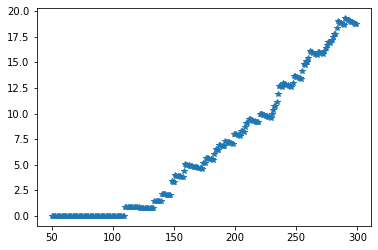

In [46]:
plt.plot(HC_summary_g2v_sort.loc[:,'n_clusters'], HC_summary_g2v_sort.loc[:,'n_1_cl']/HC_summary_g2v_sort.loc[:,'n_clusters']*100, '*')

In [50]:
b = HC_summary_g2v_sort.loc[:,'n_1_cl']/HC_summary_g2v_sort.loc[:,'n_clusters']*100
b[HC_summary_g2v_sort.loc[:,'n_clusters']==150]

259    3.333333
dtype: float64

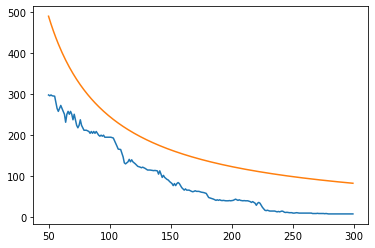

In [202]:
plt.plot(HC_summary_sort.loc[:,'n_clusters'], HC_summary_sort.loc[:,'med_cl_size'])
plt.plot(HC_summary_sort.loc[:,'n_clusters'], HC_summary_sort.loc[:,'mean_cl_size'])

In [208]:
rna = pd.read_csv('../data/RNAseqData.csv', index_col=0).transpose()

In [206]:
reload(misc)
reload(enrich)

<module 'clusterian.enrich' from '/home/ldap/ipellet/Documents/Clustering/clusterian/enrich.py'>

In [211]:
HC_g2v_evEnr = enrich.evalEnriched_all({'g2v':g2v, 'rna':rna}, enr_path='./HC_mm/Enrich', score_th = 300)

Invalid report for ./HC_mm/Enrich/HC_g2v_229/HC_g2v_229_206/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_229/HC_g2v_229_197/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_186/HC_g2v_186_172/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_262/HC_g2v_262_70/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_231/HC_g2v_231_99/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_285/HC_g2v_285_167/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_275/HC_g2v_275_88/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_164/HC_g2v_164_16/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_52/HC_g2v_52_5/GO_Biological_Process_2021.Human.enrichr.rep

In [212]:
HC_g2v_evEnr

,Alg,Dataset,Param,Prefix,File,enr_cl,enr_genes,norm_cl,norm_genes,sum_norm
0,HC,g2v,285,HC_g2v_285,./HC_mm/Enrich/HC_g2v_285,0.484848,0.037673,1.089852,1.204953,2.294805
1,HC,g2v,279,HC_g2v_279,./HC_mm/Enrich/HC_g2v_279,0.482609,0.037673,1.038166,1.204953,2.243119
2,HC,g2v,284,HC_g2v_284,./HC_mm/Enrich/HC_g2v_284,0.482609,0.037673,1.038166,1.204953,2.243119
3,HC,g2v,280,HC_g2v_280,./HC_mm/Enrich/HC_g2v_280,0.482609,0.037673,1.038166,1.204953,2.243119
4,HC,g2v,292,HC_g2v_292,./HC_mm/Enrich/HC_g2v_292,0.474576,0.038205,0.852809,1.355807,2.208616
...,...,...,...,...,...,...,...,...,...,...
242,HC,g2v,54,HC_g2v_54,./HC_mm/Enrich/HC_g2v_54,0.339623,0.023807,-2.261395,-2.728856,-4.990252
243,HC,g2v,50,HC_g2v_50,./HC_mm/Enrich/HC_g2v_50,0.340000,0.023438,-2.252688,-2.833293,-5.085981
244,HC,g2v,51,HC_g2v_51,./HC_mm/Enrich/HC_g2v_51,0.333333,0.023438,-2.406528,-2.833293,-5.239822
245,HC,g2v,53,HC_g2v_53,./HC_mm/Enrich/HC_g2v_53,0.320755,0.023438,-2.696794,-2.833293,-5.530087


In [245]:
HC_g2v_evEnr_k = pd.concat([HC_g2v_evEnr, pd.DataFrame([int(s) for s in HC_g2v_evEnr.loc[:,'Param']], columns=['k'])], axis=1)
HC_g2v_evEnr_sort = HC_g2v_evEnr_k.sort_values('k')

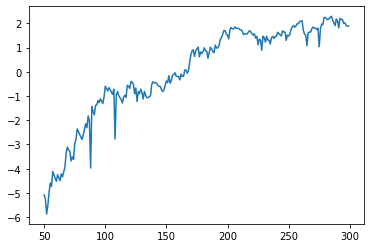

In [225]:
plt.plot(HC_g2v_evEnr_sort.loc[:,'k'], HC_g2v_evEnr_sort.loc[:,'sum_norm'])

# RNA

In [19]:
from clusterian import misc, enrich, hierarchical
import os
from importlib import reload

In [5]:
rna = pd.read_csv('../data/DataRnaseq_Transposed.csv', index_col=0)
rna.head()

,1,2,3,6,12,13,14,16,18,21,...,375,376,377,378,379,380,381,382,383,384
TSPAN6,2.348504,0.000000,3.169852,2.891336,3.858924,2.651213,2.742435,2.227225,2.197498,0.000000,...,2.607402,2.977679,2.961305,1.792733,2.738869,2.785655,2.659470,3.213155,2.733867,2.824693
DPM1,2.499342,2.385936,2.669347,2.715486,3.093237,1.367860,2.804962,2.030681,3.219171,3.246968,...,3.174785,2.656605,2.971944,2.491913,2.939316,3.907881,3.224327,3.141350,3.457804,2.961493
SCYL3,3.708034,3.031990,4.151606,4.194226,4.169525,3.867674,3.943253,2.655953,3.899867,2.972166,...,4.325659,4.037572,3.750378,3.446573,3.957723,3.897978,3.499286,3.320137,3.695153,3.586548
C1orf112,3.473538,2.385936,4.049701,3.723256,3.791233,3.253431,3.598970,2.391411,3.508284,3.462303,...,3.551197,2.997671,3.655313,2.629885,3.087747,3.978672,2.659470,2.097338,3.314001,2.985182
FGR,3.508168,4.740541,2.901855,2.687637,1.192021,2.118343,2.726172,2.227225,2.109040,2.591975,...,2.714580,2.116040,2.832102,3.414750,2.862954,2.448971,2.494786,2.564371,3.102852,3.783862


In [6]:
Ward_rna = cluster.ward_tree(rna)

In [7]:
HC_rna_lab = hierarchical.ward_tree_2_label_mat(Ward_rna[0], genes=rna.index)

In [14]:
HC_rna_lab

,14809,14808,14807,14806,14805,14804,14803,14802,14801,14800,...,10,9,8,7,6,5,4,3,2,1
TSPAN6,0,0,0,0,0,0,0,0,0,0,...,29607,29608,29608,29608,29608,29608,29608,29614,29614,29616
DPM1,1,1,1,1,1,1,1,1,1,1,...,29607,29608,29608,29608,29608,29608,29608,29614,29614,29616
SCYL3,2,2,2,2,2,2,2,2,2,2,...,29606,29606,29606,29606,29606,29606,29613,29613,29615,29616
C1orf112,3,3,3,3,3,3,3,3,3,3,...,29596,29596,29596,29596,29611,29611,29613,29613,29615,29616
FGR,4,4,4,4,4,4,4,4,4,4,...,29607,29608,29608,29608,29608,29608,29608,29614,29614,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRIN2B,14804,14804,14804,14804,14804,14804,14804,14804,14804,14804,...,29601,29601,29609,29609,29609,29609,29609,29614,29614,29616
LINC02604,14805,14805,14805,14805,14805,14805,14805,14805,14805,14805,...,29581,29608,29608,29608,29608,29608,29608,29614,29614,29616
ZBTB8B,14806,14806,14806,14806,14806,14806,14806,14806,14806,14806,...,29601,29601,29609,29609,29609,29609,29609,29614,29614,29616
DGCR11,14807,14807,14807,14807,14807,14807,14807,14807,14807,14807,...,29607,29608,29608,29608,29608,29608,29608,29614,29614,29616


In [15]:
mm_path = './HC_mm'
k_ = np.linspace(50,300,100,dtype=int)

In [16]:
for k in k_:
    lab = HC_rna_lab.loc[:,k]
    mm = misc.lab2mat(lab, genes=rna.index)
    mm.to_csv(os.path.join(mm_path,'HC_rna_'+str(k)), header=False, index=True)

In [20]:
reload(enrich)

<module 'clusterian.enrich' from '/home/ldap/ipellet/Documents/Clustering/clusterian/enrich.py'>

In [21]:
enrdir = 'Enrich'
enrich.runEnrichr_directory(mm_path = mm_path, mm_enrich_dir = enrdir)

Runing analysis on  HC_rna_80
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_80
Runing analysis on  HC_rna_234
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_234
Runing analysis on  HC_rna_209
out_dir : ./HC_mm/Enrich


2022-07-11 17:37:31,601 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-11 17:37:31,799 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 72
Enrichment results in : ./HC_mm/Enrich/HC_rna_209
Runing analysis on  HC_rna_289
out_dir : ./HC_mm/Enrich
Cluster 100
Cluster 280
Enrichment results in : ./HC_mm/Enrich/HC_rna_289
Runing analysis on  HC_rna_272
out_dir : ./HC_mm/Enrich
Cluster 86
Enrichment results in : ./HC_mm/Enrich/HC_rna_272
Runing analysis on  HC_rna_294
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_294
Runing analysis on  HC_rna_60
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_60
Runing analysis on  HC_rna_246
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_246
Runing analysis on  HC_rna_50
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_50
Runing analysis on  HC_rna_183
out_dir : ./HC_mm/Enrich
Cluster 120
Enrichment results in : ./HC_mm/Enrich/HC_rna_183
Runing analysis on  HC_rna_103
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_103
Runing analysis on  HC_rna_52
out_dir : ./HC_mm/

2022-07-11 21:01:32,385 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-11 21:01:32,582 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 120
Cluster 185
Enrichment results in : ./HC_mm/Enrich/HC_rna_201
Runing analysis on  HC_rna_72
out_dir : ./HC_mm/Enrich
Cluster 27
Enrichment results in : ./HC_mm/Enrich/HC_rna_72
Runing analysis on  HC_rna_161
out_dir : ./HC_mm/Enrich


2022-07-11 21:24:34,317 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-11 21:24:34,514 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 128
Enrichment results in : ./HC_mm/Enrich/HC_rna_161
Runing analysis on  HC_rna_97
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_97
Runing analysis on  HC_rna_259
out_dir : ./HC_mm/Enrich


2022-07-11 21:41:59,173 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-11 21:41:59,369 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 160
Enrichment results in : ./HC_mm/Enrich/HC_rna_259
Runing analysis on  HC_rna_186
out_dir : ./HC_mm/Enrich


2022-07-11 21:52:51,538 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-11 21:52:51,735 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 41
Cluster 55
Enrichment results in : ./HC_mm/Enrich/HC_rna_186
Runing analysis on  HC_rna_140
out_dir : ./HC_mm/Enrich
Cluster 98
Enrichment results in : ./HC_mm/Enrich/HC_rna_140
Runing analysis on  HC_rna_262
out_dir : ./HC_mm/Enrich
Cluster 69
Enrichment results in : ./HC_mm/Enrich/HC_rna_262
Runing analysis on  HC_rna_219
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_219
Runing analysis on  HC_rna_173
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_173
Runing analysis on  HC_rna_110
out_dir : ./HC_mm/Enrich
Cluster 2
Enrichment results in : ./HC_mm/Enrich/HC_rna_110
Runing analysis on  HC_rna_229
out_dir : ./HC_mm/Enrich
Cluster 48
Enrichment results in : ./HC_mm/Enrich/HC_rna_229
Runing analysis on  HC_rna_284
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_284
Runing analysis on  HC_rna_214
out_dir : ./HC_mm/Enrich
Cluster 140
Enrichment results in : ./HC_mm/Enrich/HC_rna_214
Runing analysis on  HC_rn

2022-07-12 05:54:41,347 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-12 05:54:41,543 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 61
Cluster 86
Cluster 154
Enrichment results in : ./HC_mm/Enrich/HC_rna_216
Runing analysis on  HC_rna_95
out_dir : ./HC_mm/Enrich
Cluster 76
Enrichment results in : ./HC_mm/Enrich/HC_rna_95
Runing analysis on  HC_rna_166
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_166
Runing analysis on  HC_rna_274
out_dir : ./HC_mm/Enrich


2022-07-12 06:30:46,940 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-12 06:30:47,138 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 115
Enrichment results in : ./HC_mm/Enrich/HC_rna_274
Runing analysis on  HC_rna_231
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_231
Runing analysis on  HC_rna_292
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_292
Runing analysis on  HC_rna_133
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_133
Runing analysis on  HC_rna_244
out_dir : ./HC_mm/Enrich
Cluster 94
Enrichment results in : ./HC_mm/Enrich/HC_rna_244
Runing analysis on  HC_rna_151
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_151
Runing analysis on  HC_rna_239
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_239
Runing analysis on  HC_rna_143
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_143
Runing analysis on  HC_rna_148
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_148
Runing analysis on  HC_rna_277
out_dir : ./HC_mm/Enrich
Enrichment results in :

2022-07-12 10:05:31,158 Error fetching enrichment results: GO_Biological_Process_2021
2022-07-12 10:05:31,354 Error fetching enrichment results: GO_Biological_Process_2021


Cluster 27
Enrichment results in : ./HC_mm/Enrich/HC_rna_120
Runing analysis on  HC_rna_108
out_dir : ./HC_mm/Enrich
Cluster 68
Enrichment results in : ./HC_mm/Enrich/HC_rna_108
Runing analysis on  HC_rna_105
out_dir : ./HC_mm/Enrich
Cluster 67
Enrichment results in : ./HC_mm/Enrich/HC_rna_105
Runing analysis on  HC_rna_252
out_dir : ./HC_mm/Enrich
Enrichment results in : ./HC_mm/Enrich/HC_rna_252
Runing analysis on  HC_rna_196
out_dir : ./HC_mm/Enrich


KeyboardInterrupt: 

In [22]:
HC_evEnr = enrich.evalEnriched_all({'g2v':g2v, 'rna':rna}, enr_path='./HC_mm/Enrich', score_th = 300)

Invalid report for ./HC_mm/Enrich/HC_g2v_229/HC_g2v_229_206/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_229/HC_g2v_229_197/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_rna_145/HC_rna_145_61/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_262/HC_g2v_262_70/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_rna_191/HC_rna_191_79/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_231/HC_g2v_231_99/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_285/HC_g2v_285_167/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_rna_87/HC_rna_87_0/GO_Biological_Process_2021.Human.enrichr.reports.txt
Invalid report for ./HC_mm/Enrich/HC_g2v_275/HC_g2v_275_88/GO_Biological_Process_2021.Human.enrichr.repo

In [23]:
HC_rna_evEnr = HC_evEnr.loc[HC_evEnr.loc[:,'Dataset']=='rna',:]
HC_rna_evEnr_k = pd.concat([HC_rna_evEnr, pd.DataFrame([int(s) for s in HC_rna_evEnr.loc[:,'Param']], columns=['k'])], axis=1)
HC_rna_evEnr_sort = HC_rna_evEnr_k.sort_values('k')

In [24]:
HC_rna_evEnr_sort

,Alg,Dataset,Param,Prefix,File,enr_cl,enr_genes,norm_cl,norm_genes,sum_norm,k
87,HC,rna,50,HC_rna_50,./HC_mm/Enrich/HC_rna_50,0.600000,0.032548,0.356923,-0.511914,-0.154991,50.0
85,HC,rna,52,HC_rna_52,./HC_mm/Enrich/HC_rna_52,0.627451,0.034911,0.511490,-0.440133,0.071357,52.0
86,HC,rna,55,HC_rna_55,./HC_mm/Enrich/HC_rna_55,0.600000,0.036599,0.356923,-0.388861,-0.031938,55.0
84,HC,rna,57,HC_rna_57,./HC_mm/Enrich/HC_rna_57,0.614035,0.038017,0.435950,-0.345793,0.090157,57.0
83,HC,rna,60,HC_rna_60,./HC_mm/Enrich/HC_rna_60,0.633333,0.040043,0.544612,-0.284266,0.260346,60.0
...,...,...,...,...,...,...,...,...,...,...,...
3,HC,rna,292,HC_rna_292,./HC_mm/Enrich/HC_rna_292,0.870175,0.153218,1.878190,3.153021,5.031211,292.0
2,HC,rna,294,HC_rna_294,./HC_mm/Enrich/HC_rna_294,0.871080,0.154298,1.883284,3.185836,5.069119,294.0
1,HC,rna,297,HC_rna_297,./HC_mm/Enrich/HC_rna_297,0.871528,0.155108,1.885804,3.210446,5.096251,297.0
0,HC,rna,300,HC_rna_300,./HC_mm/Enrich/HC_rna_300,0.873288,0.155649,1.895714,3.226853,5.122567,300.0


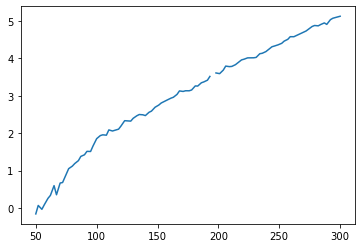

In [25]:
plt.plot(HC_rna_evEnr_sort.loc[:,'k'], HC_rna_evEnr_sort.loc[:,'sum_norm'])

In [26]:
HC_summary = misc.summary_all(mm_path='./HC_mm')

In [32]:
HC_summary_rna_sort = HC_summary.loc[HC_summary.loc[:,'Dataset']=='rna',:].sort_values('n_clusters')

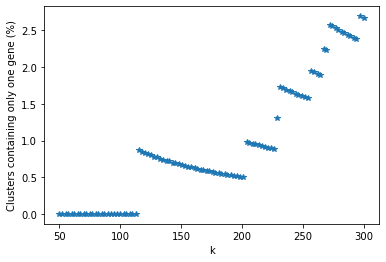

In [39]:
plt.plot(HC_summary_rna_sort.loc[:,'n_clusters'], HC_summary_rna_sort.loc[:,'n_1_cl']/HC_summary_rna_sort.loc[:,'n_clusters']*100,'*')
plt.xlabel('k')
plt.ylabel('Clusters containing only one gene (%)');

In [43]:
a = HC_summary_rna_sort.loc[:,'n_1_cl']/HC_summary_rna_sort.loc[:,'n_clusters']*100
a[HC_summary_rna_sort.loc[:,'n_clusters']==201]

75    0.497512
dtype: float64